In [1]:
!pip install pyswarm
!pip install shap

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=a1b19876c48bf515b85dd72844f693eac342e49122d2ea1eb94c5c278df9aa2d
  Stored in directory: /root/.cache/pip/wheels/93/15/89/3970ef96abd6123028010a90f007c4e6a2bed700db0aa2d36a
Successfully built pyswarm


In [2]:
# === Data manipulation and preprocessing ===
import pandas as pd
import numpy as np
import random
import os
import time

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(suppress=True)

# === Scaling and model evaluation ===
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    silhouette_score,
    calinski_harabasz_score
)

# === Dimensionality reduction and clustering ===
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

# === PyTorch - Neural Network and DataLoader ===
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# === Optimization ===
from pyswarm import pso


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Only needed if you're loading data from Google Drive

Mounted at /content/drive


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
df_2017_2020 = pd.read_csv("/content/drive/MyDrive/Network Maintenace - With & without maintenace/encoded-data/Treatment-encoded-dataset-2017-2020/df_encoded_2017_2020.csv")

In [6]:
df_2017_2020.shape

(5110, 27)

In [7]:
df_2017_2020.head(10)

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0       1395.0                    156.0                     54.0   
1      22429.0                    767.0                   4163.0   
2      22429.0                    767.0                   4163.0   
3      26595.0                    878.0                    186.0   
4       1964.0                     92.0                      6.0   
5       2182.0                    175.0                    242.0   
6      19601.0                    568.0                    196.0   
7      14674.0                    264.0                    205.0   
8      35793.0                   1432.0                    107.0   
9      10559.0                    443.0                     74.0   

   Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0              1590.0        82.0                     0.0   
1             22430.0       101.0                    10.0   
2             22430.0       128.0                    10.0   
3             37230.0       172.8                     0.0   
4              2750.0       287.0                     0.0   
5              3060.0       245.5                     0.0   
6             27440.0       196.5                     0.0   
7             27000.0       219.8                     0.0   
8             50110.0       209.9                     0.0   
9             19430.0       359.0                     0.0   

   Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                        6.0                   15.0              5   
1                        0.0                    6.0              1   
2                        0.0                    6.0              1   
3                        3.0                    6.0              3   
4                        3.0                    8.0              3   
5                        3.0                    8.0              3   
6                        3.0                    8.0              3   
7                        3.0                    8.0              3   
8                        3.0                    6.0              3   
9                        3.0                    8.0              3   

   Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0                  6                 2             0.0   
1                  3                 2             0.0   
2                  3                 2             0.0   
3                  2                 3             0.2   
4                  2                 3             0.1   
5                  2                 3             0.3   
6                  2                 3             0.2   
7                  2                 3             0.2   
8                  2                 3             0.2   
9                  2                 3             0.1   

   Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                      0.0              0.0                            2.0   
1                      0.0              0.0                            3.5   
2                      0.0              0.0                            3.5   
3                      0.0              0.0                            1.5   
4                      0.0              0.0                            1.5   
5                      0.0              0.0                            1.5   
6                      0.5              0.0                            1.5   
7                      4.8              0.0                            1.5   
8                      0.8              0.0                            1.5   
9                      1.0              0.0                            1.5   

   IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
0        35.2      78.5     1081.5         5.6           1089.7     32   
1        88.2      76.0      896.3         7.3            979.6      8   
2       125.0      76.0      896.3         7.3            979.6      8   
3       163.4    

In [8]:
df_2017_2020.isnull().sum()

AADT_mean_x                       0
AADT_Single_Unit_mean_x           0
AADT_Combination_mean_x           0
Future_AADT_mean_x                0
IRI_mean_x                        0
Thickness_Rigid_mean_x            0
Thickness_Flexible_mean_x         0
Base_Thickness_mean_x             0
F_System_mode                     0
Surface_Type_mode                 0
Base_Type_mode_x                  0
Rutting_mean_x                    0
Cracking_Percent_mean_x           0
Faulting_mean_x                   0
Last_Overlay_Thickness_mean_x     0
IRI_mean_y                        0
RHU_AV_x                         16
FRZ_IDX_x                        16
TEMP_AVG_x                       16
PRECIPITATION_x                  16
Age_x                             0
Urban_Type_rural                  0
Urban_Type_small urban            0
Urban_Type_urban                  0
Treatment_type_Resurfacing        0
Treatment_type_Thick Layers       0
Treatment_type_Thin Layers        0
dtype: int64

In [9]:
df = df_2017_2020.dropna()

In [10]:
df.shape

(5094, 27)

In [11]:
df.columns

Index(['AADT_mean_x', 'AADT_Single_Unit_mean_x', 'AADT_Combination_mean_x',
       'Future_AADT_mean_x', 'IRI_mean_x', 'Thickness_Rigid_mean_x',
       'Thickness_Flexible_mean_x', 'Base_Thickness_mean_x', 'F_System_mode',
       'Surface_Type_mode', 'Base_Type_mode_x', 'Rutting_mean_x',
       'Cracking_Percent_mean_x', 'Faulting_mean_x',
       'Last_Overlay_Thickness_mean_x', 'IRI_mean_y', 'RHU_AV_x', 'FRZ_IDX_x',
       'TEMP_AVG_x', 'PRECIPITATION_x', 'Age_x', 'Urban_Type_rural',
       'Urban_Type_small urban', 'Urban_Type_urban',
       'Treatment_type_Resurfacing', 'Treatment_type_Thick Layers',
       'Treatment_type_Thin Layers'],
      dtype='object')

In [12]:
df.drop(['Last_Overlay_Thickness_mean_x'], axis=1, inplace=True)

/tmp/ipython-input-705596893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Last_Overlay_Thickness_mean_x'], axis=1, inplace=True)


In [13]:
df.columns

Index(['AADT_mean_x', 'AADT_Single_Unit_mean_x', 'AADT_Combination_mean_x',
       'Future_AADT_mean_x', 'IRI_mean_x', 'Thickness_Rigid_mean_x',
       'Thickness_Flexible_mean_x', 'Base_Thickness_mean_x', 'F_System_mode',
       'Surface_Type_mode', 'Base_Type_mode_x', 'Rutting_mean_x',
       'Cracking_Percent_mean_x', 'Faulting_mean_x', 'IRI_mean_y', 'RHU_AV_x',
       'FRZ_IDX_x', 'TEMP_AVG_x', 'PRECIPITATION_x', 'Age_x',
       'Urban_Type_rural', 'Urban_Type_small urban', 'Urban_Type_urban',
       'Treatment_type_Resurfacing', 'Treatment_type_Thick Layers',
       'Treatment_type_Thin Layers'],
      dtype='object')

In [14]:
num_dupes = df.duplicated(keep=False).sum()
print(f"Duplicate rows in df (all columns considered): {num_dupes}")

Duplicate rows in df (all columns considered): 8


In [15]:
# --- Remove duplicate rows across all columns ---
initial_rows = len(df)

df.drop_duplicates(inplace=True)   # modifies df in place

print(f"Duplicates removed: {initial_rows - len(df)}")
print(f"New DataFrame shape: {df.shape}")


Duplicates removed: 4
New DataFrame shape: (5090, 26)


/tmp/ipython-input-3110374706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)   # modifies df in place


In [16]:
df.shape

(5090, 26)

In [17]:
# ==== SETUP ====
save_dir = "/content/drive/MyDrive/Network Maintenace - With & without maintenace/outputs/output-2017-2020/pso-Recommended-ANN-Minmax-2017-2020-(Maintenance)"

os.makedirs(save_dir, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [18]:
X = df.drop(columns=['IRI_mean_y'])  # Drop target column to keep 21 input features
y = df[['IRI_mean_y']]               # Target stays (N, 1)

In [19]:
y.shape

(5090, 1)

In [20]:
print(X.shape)  # Should be (4060, 21)
print(y.shape)  # Should be (4060, 1)

(5090, 25)
(5090, 1)


In [21]:
type(y)

pandas.core.frame.DataFrame

In [22]:
# Train/val/test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [23]:
print(X_test.shape)

(764, 25)


In [24]:
print(X_train.shape)  # Should be [num_samples, 26]
print(y_train.shape)  # Should be [num_samples, 1] or [num_samples]

(3563, 25)
(3563, 1)


In [25]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_val_scaled = scaler_x.transform(X_val)
X_test_scaled = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

X_train_unscaled_df = X_train.copy().reset_index(drop=True)
X_test_unscaled_df = X_test.copy().reset_index(drop=True)

In [26]:
X_test_unscaled_df.shape

(764, 25)

In [27]:
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_scaled, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_val_t = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
y_val_t = torch.tensor(y_val_scaled, dtype=torch.float32).to(device)

In [28]:
## Build Model
class ANNModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.Linear_relu_stack = nn.Sequential(
        nn.Linear(in_features=25, out_features=25, bias=True),   # hidden layer 1 with 25 neurons
        nn.ReLU(),
        nn.Linear(in_features=25, out_features=25, bias=True),   # hidden layer 2 with 25 neurons
        nn.ReLU(),
        nn.Linear(in_features=25, out_features=25, bias=True),   # hidden layer 3 with 25 neurons
        nn.ReLU(),
        nn.Linear(in_features=25, out_features=1) ## output layer
    )

  def forward(self, x):
    return self.Linear_relu_stack(x) ## x is just the name of the parameter representing input data in that function.

## initiate model and send model to device

model = ANNModel().to(device)

In [29]:
## Loss function
criterion = nn.MSELoss()

## Optimizer: Adam
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [30]:
# === Set paths ===
best_model_path = best_model_path = "/content/drive/MyDrive/Network Maintenace - With & without maintenace/outputs/output-2017-2020/pso-Recommended-ANN-Minmax-2017-2020-(Maintenance)/best_ann_model.pt"
loss_plot_path =  "/content/drive/MyDrive/Network Maintenace - With & without maintenace/outputs/output-2017-2020/pso-Recommended-ANN-Minmax-2017-2020-(Maintenance)"

# === Initialize containers ===
train_losses = []
val_losses = []
best_loss = float('inf')
counter = 0
patience = 100
min_delta = 1e-4
epochs = 3000

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_batch.size(0)

    avg_train_loss = epoch_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    # === Validation ===
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_t)
        val_loss = criterion(val_outputs, y_val_t).item()
        val_losses.append(val_loss)

    # === Early stopping ===
    if val_loss < best_loss - min_delta:
        best_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), best_model_path)
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Print progress
    print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {avg_train_loss:.6f} - Val Loss: {val_loss:.6f}")

Epoch [1/3000] - Train Loss: 0.018736 - Val Loss: 0.014032
Epoch [2/3000] - Train Loss: 0.017045 - Val Loss: 0.013875
Epoch [3/3000] - Train Loss: 0.016873 - Val Loss: 0.013727
Epoch [4/3000] - Train Loss: 0.016704 - Val Loss: 0.013578
Epoch [5/3000] - Train Loss: 0.016558 - Val Loss: 0.013458
Epoch [6/3000] - Train Loss: 0.016415 - Val Loss: 0.013395
Epoch [7/3000] - Train Loss: 0.016301 - Val Loss: 0.013242
Epoch [8/3000] - Train Loss: 0.016181 - Val Loss: 0.013156
Epoch [9/3000] - Train Loss: 0.016060 - Val Loss: 0.013042
Epoch [10/3000] - Train Loss: 0.015945 - Val Loss: 0.012956
Epoch [11/3000] - Train Loss: 0.015828 - Val Loss: 0.012841
Epoch [12/3000] - Train Loss: 0.015711 - Val Loss: 0.012739
Epoch [13/3000] - Train Loss: 0.015598 - Val Loss: 0.012637
Epoch [14/3000] - Train Loss: 0.015472 - Val Loss: 0.012552
Epoch [15/3000] - Train Loss: 0.015345 - Val Loss: 0.012417
Epoch [16/3000] - Train Loss: 0.015209 - Val Loss: 0.012302
Epoch [17/3000] - Train Loss: 0.015076 - Val Loss

In [31]:
# 📉 Loss Curve
# ==============================
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss Curve 2-year IRI Prediction Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# ================================
# 🔁 Predict on Training Dataset
# ================================
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)

with torch.no_grad():
    y_pred_train = model(X_train_t).cpu().numpy()

# Inverse transform to get actual scale
y_pred_train = scaler_y.inverse_transform(y_pred_train)
y_true_train = y_train.values


In [33]:
# ==============================
# 🔁 Predict on Testing Dataset
# ==============================
model.load_state_dict(torch.load(best_model_path))
model.eval()

X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

with torch.no_grad():
    y_pred_test = model(X_test_t).cpu().numpy()

y_pred_test = scaler_y.inverse_transform(y_pred_test)
y_true_test = y_test.values

In [34]:
# Merge predictions
X_test_unscaled_df['Actual_IRI'] = y_true_test.flatten()
X_test_unscaled_df['Predicted_IRI'] = y_pred_test.flatten()
X_test_unscaled_df.to_csv("evaluated_test_set_with_predictions.csv", index=False)

In [35]:
## No duplicates are here. when you compare x_test with df there are some duplicate issues.
X_test_unscaled_df.shape

(764, 27)

In [36]:
# Columns that exist in both dataframes
shared_cols = X_test_unscaled_df.columns.intersection(df.columns)

# Align order using only those shared columns
X_aligned = X_test_unscaled_df[shared_cols]
df_aligned = df[shared_cols]

# Inner‑merge on all shared columns to find matching rows
matched_df = pd.merge(X_aligned, df_aligned, how='inner')

print(f"Number of matching rows: {len(matched_df)}")

Number of matching rows: 785


In [37]:
# 1 — how many duplicates per frame on the shared columns?
dupes_X  = X_aligned.duplicated(keep=False).sum()
dupes_df = df_aligned.duplicated(keep=False).sum()
print(f"Rows in X_aligned that repeat:  {dupes_X}")
print(f"Rows in df_aligned that repeat: {dupes_df}")

# 2 — show the specific feature rows that drive the inflation
inflaters = (
    pd.concat([
        X_aligned.assign(src='X'),
        df_aligned.assign(src='df')
    ])
    .groupby(list(shared_cols), as_index=False)
    .size()
    .query('size > 1')  # occurs >1× across combined data
    .sort_values('size', ascending=False)
)

Rows in X_aligned that repeat:  4
Rows in df_aligned that repeat: 128


In [38]:
# ==== Metrics Function ====
def calculate_metrics(y_true, y_pred, name="Model"):
    n = len(y_true)
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    mae = np.mean(np.abs(y_true - y_pred))
    epsilon = 1e-10
    mape = (100 / n) * np.sum(np.abs((y_true - y_pred) / (y_true + epsilon)))
    vaf = (1 - np.var(y_true - y_pred) / np.var(y_true)) * 100
    rsr = rmse / np.sqrt(np.mean((y_true - np.mean(y_true))**2))
    wmap = (np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))) * 100
    m20 = np.sum(np.abs(y_true - y_pred) <= 0.2 * np.abs(y_true))
    a20index = m20 / n

    # Print results
    print(f"🔹 {name}:")
    print(f"   R²       = {r2:.4f}")
    print(f"   RMSE     = {rmse:.4f}")
    print(f"   MAE      = {mae:.4f}")
    print(f"   MAPE     = {mape:.4f}%")
    print(f"   VAF      = {vaf:.4f}%")
    print(f"   RSR      = {rsr:.4f}")
    print(f"   WMAPE    = {wmap:.4f}%")
    print(f"   a20index = {a20index:.4f}")

    return rmse, r2, mae, mape, vaf, rsr, wmap, a20index

# Example usage
rmse, r2, mae, mape, vaf, rsr, wmap, a20index = calculate_metrics(y_true_test, y_pred_test, name="Test Model")


🔹 Test Model:
   R²       = 0.7445
   RMSE     = 25.6240
   MAE      = 17.3873
   MAPE     = 22.4564%
   VAF      = 74.5045%
   RSR      = 0.5055
   WMAPE    = 20.9760%
   a20index = 0.5825


In [39]:
# ==============================
# 📊 Scatter Plot
# ==============================
plt.figure(figsize=(6, 6))
plt.scatter(y_true_test, y_pred_test, alpha=0.6)
plt.plot([y_true_test.min(), y_true_test.max()],
         [y_true_test.min(), y_true_test.max()], 'r--')
plt.xlabel("Actual IRI")
plt.ylabel("Predicted IRI")
plt.title("Actual vs Predicted IRI for 3-Year Prediction Horizon")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "scatter_actual_vs_predicted_2_year.png"))
plt.show()


## Metrics for each treatment types

In [40]:
df_test_thin_layover = X_train_unscaled_df[X_train_unscaled_df['Treatment_type_Resurfacing'] == 1]
print(df_test_thin_layover.shape)
df_test_thick_layover = X_train_unscaled_df[X_train_unscaled_df['Treatment_type_Thick Layers'] == 1]
print(df_test_thick_layover.shape)
df_test_resurfacing_layover = X_train_unscaled_df[X_train_unscaled_df['Treatment_type_Thin Layers'] == 1]
print(df_test_resurfacing_layover.shape)

(197, 25)
(814, 25)
(2552, 25)


In [41]:
df_test_thin_layover = X_test_unscaled_df[X_test_unscaled_df['Treatment_type_Resurfacing'] == 1]
print(df_test_thin_layover.shape)
df_test_thick_layover = X_test_unscaled_df[X_test_unscaled_df['Treatment_type_Thick Layers'] == 1]
print(df_test_thick_layover.shape)
df_test_resurfacing_layover = X_test_unscaled_df[X_test_unscaled_df['Treatment_type_Thin Layers'] == 1]
print(df_test_resurfacing_layover.shape)

(46, 27)
(146, 27)
(572, 27)


## Separate by treatment types

In [42]:
# ============================================
# 📊 1. Add true and predicted to train dataset
# ============================================
X_train_unscaled_df = X_train_unscaled_df.copy()
X_train_unscaled_df['y_true'] = y_true_train.flatten()
X_train_unscaled_df['y_pred'] = y_pred_train.flatten()

# =================================================
# 📊 2. Add true and predicted to test dataset
# =================================================
X_test_unscaled_df = X_test_unscaled_df.copy()
X_test_unscaled_df['y_true'] = y_true_test.flatten()
X_test_unscaled_df['y_pred'] = y_pred_test.flatten()

# ============================================
# 📈 3. Metric calculation function (with WMAPE)
# ============================================
def evaluate_metrics(df):
  n = len(df['y_true'])
  rmse = np.sqrt(np.mean((df['y_true']- df['y_pred'])**2))
  ss_res = np.sum((df['y_true']- df['y_pred'])**2)
  ss_tot = np.sum((df['y_true'] - np.mean(df['y_true']))**2)
  r2 = 1 - (ss_res / ss_tot)
  mae = np.mean(np.abs(df['y_true']- df['y_pred']))
  epsilon = 1e-10
  mape = (100 / n) * np.sum(np.abs((df['y_true']- df['y_pred']) / (df['y_true'] + epsilon)))
  vaf = (1 - np.var(df['y_true']- df['y_pred']) / np.var(df['y_true'])) * 100
  rsr = rmse / np.sqrt(np.mean((df['y_true'] - np.mean(df['y_true']))**2))
  wmap = (np.sum(np.abs(df['y_true']- df['y_pred'])) / np.sum(np.abs(df['y_true']))) * 100
  m20 = np.sum(np.abs(df['y_true']- df['y_pred']) <= 0.2 * np.abs(df['y_true']))
  a20index = m20 / n
  return rmse, r2, mae, mape, vaf, rsr, wmap, a20index

# ============================================
# 🏷️ 4. Define treatment mapping
# ============================================
treatments = {
    'Thin Layers': 'Treatment_type_Thin Layers',
    'Thick Layers': 'Treatment_type_Thick Layers',
    'Resurfacing': 'Treatment_type_Resurfacing',
}

# ============================================
# ============================================
# 📊 5. Evaluate on TRAIN data
# ============================================
print("\n📌 TRAIN SET RESULTS:")
for name, col in treatments.items():
    df_sub = X_train_unscaled_df[X_train_unscaled_df[col] == 1]
    if len(df_sub) > 0:
        rmse, r2, mae, mape, vaf, rsr, wmap, a20index = evaluate_metrics(df_sub)
        print(f"[TRAIN] {name:12} — R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, WMAPE: {wmap:.2f}%, n={len(df_sub)}")
    else:
        print(f"[TRAIN] {name:12} — No data found.")

# ============================================
# 📊 6. Evaluate on TEST data
# ============================================
print("\n📌 TEST SET RESULTS:")
for name, col in treatments.items():
    df_sub = X_test_unscaled_df[X_test_unscaled_df[col] == 1]
    if len(df_sub) > 0:
        rmse, r2, mae, mape, vaf, rsr, wmap, a20index = evaluate_metrics(df_sub)
        print(f"[TEST]  {name:12} — R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, WMAPE: {wmap:.2f}%, n={len(df_sub)}")
    else:
        print(f"[TEST]  {name:12} — No data found.")



📌 TRAIN SET RESULTS:
[TRAIN] Thin Layers  — R²: 0.7251, MAE: 18.2986, RMSE: 26.3010, WMAPE: 20.87%, n=2552
[TRAIN] Thick Layers — R²: 0.6692, MAE: 13.9015, RMSE: 19.4076, WMAPE: 21.53%, n=814
[TRAIN] Resurfacing  — R²: 0.7599, MAE: 15.2003, RMSE: 20.1029, WMAPE: 19.33%, n=197

📌 TEST SET RESULTS:
[TEST]  Thin Layers  — R²: 0.7436, MAE: 18.2466, RMSE: 27.1972, WMAPE: 20.42%, n=572
[TEST]  Thick Layers — R²: 0.6436, MAE: 14.5660, RMSE: 20.4255, WMAPE: 23.42%, n=146
[TEST]  Resurfacing  — R²: 0.6189, MAE: 15.6572, RMSE: 19.5739, WMAPE: 22.93%, n=46


In [43]:
# =======================================================
# 📊 7+8. Collect metrics for both TRAIN and TEST sets
# =======================================================
def collect_metrics(df, label):
    records = []
    for name, col in treatments.items():
        df_sub = df[df[col] == 1]
        if len(df_sub) > 0:
            # Get all metrics from evaluate_metrics
            rmse, r2, mae, mape, vaf, rsr, wmap, a20index = evaluate_metrics(df_sub)

            records.append({
                'Treatment': name,
                'R2': r2,
                'RMSE': rmse,
                'MAE': mae,
                'MAPE (%)': mape,
                'VAF (%)': vaf,
                'RSR': rsr,
                'WMAPE (%)': wmap,
                'a20index': a20index,
                'Set': label
            })
    return pd.DataFrame(records)

df_train_plot = collect_metrics(X_train_unscaled_df, 'Train')
df_test_plot = collect_metrics(X_test_unscaled_df, 'Test')

# =======================================================
# 📊 Combined Plot: Train & Test side-by-side
# =======================================================
metrics = ['R2', 'RMSE', 'MAE', 'MAPE (%)', 'VAF (%)', 'RSR', 'WMAPE (%)', 'a20index']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))
axes = axes.flatten()  # ✅ Flatten to 1D array for easy indexing

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot TRAIN metrics (first row)
for i, metric in enumerate(metrics):
    axes[i].bar(df_train_plot['Treatment'], df_train_plot[metric],
                color=colors[i % len(colors)], edgecolor='black')
    axes[i].set_title(f"[TRAIN] {metric} by Treatment Type", fontsize=13)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(axis='y', linestyle='--', linewidth=0.7)


# Plot TEST metrics (second row)
for i, metric in enumerate(metrics):
    axes[i].bar(df_test_plot['Treatment'], df_test_plot[metric],
                color=colors[i % len(colors)], edgecolor='black')
    axes[i].set_title(f"[TEST] {metric} by Treatment Type", fontsize=13)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


## Now separate for urban type

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ============================================================
# ✅ Add true and predicted values
# ============================================================
X_train_unscaled_df['y_true'] = y_true_train.flatten()
X_train_unscaled_df['y_pred'] = y_pred_train.flatten()
X_test_unscaled_df['y_true'] = y_true_test.flatten()
X_test_unscaled_df['y_pred'] = y_pred_test.flatten()

# ============================================================
# ✅ Define treatment types and urban types
# ============================================================
treatments = {
    'Thin Layers': 'Treatment_type_Thin Layers',
    'Thick Layers': 'Treatment_type_Thick Layers',
    'Resurfacing': 'Treatment_type_Resurfacing',
}

urban_types = {
    'Rural': 'Urban_Type_rural',
    'Small Urban': 'Urban_Type_small urban',
    'Urban': 'Urban_Type_urban',
}

# ============================================================
# ✅ Define evaluation function
# ============================================================
def evaluate_metrics(df):
    n = len(df['y_true'])
    rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
    ss_res = np.sum((df['y_true'] - df['y_pred'])**2)
    ss_tot = np.sum((df['y_true'] - np.mean(df['y_true']))**2)
    r2 = 1 - (ss_res / ss_tot)
    mae = np.mean(np.abs(df['y_true'] - df['y_pred']))
    epsilon = 1e-10
    mape = (100 / n) * np.sum(np.abs((df['y_true'] - df['y_pred']) / (df['y_true'] + epsilon)))
    vaf = (1 - np.var(df['y_true'] - df['y_pred']) / np.var(df['y_true'])) * 100
    rsr = rmse / np.sqrt(np.mean((df['y_true'] - np.mean(df['y_true']))**2))
    wmap = (np.sum(np.abs(df['y_true'] - df['y_pred'])) / np.sum(np.abs(df['y_true']))) * 100
    m20 = np.sum(np.abs(df['y_true'] - df['y_pred']) <= 0.2 * np.abs(df['y_true']))
    a20index = m20 / n
    return rmse, r2, mae, wmap

# ============================================================
# ✅ Loop: For each Urban Type → For each Treatment Type
# ============================================================
print("📊 Urban Type – Treatment Breakdown & R² Analysis\n")

results = {}

for urban_name, urban_col in urban_types.items():
    print(f"🔹 Urban Type: {urban_name}")
    urban_df = X_train_unscaled_df[X_train_unscaled_df[urban_col] == 1]

    for treatment_name, treatment_col in treatments.items():
        df_sub = urban_df[urban_df[treatment_col] == 1]
        count = len(df_sub)
        if count > 0:
            rmse, r2, mae, wmape = evaluate_metrics(df_sub)
            print(f"   ▶ {treatment_name:12} — n={count:<4} | R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, WMAPE: {wmape:.4f}")
        else:
            print(f"   ▶ {treatment_name:12} — n=0    | No data")
    print("")


📊 Urban Type – Treatment Breakdown & R² Analysis

🔹 Urban Type: Rural
   ▶ Thin Layers  — n=946  | R²: 0.6150, MAE: 15.60, RMSE: 22.22, WMAPE: 22.0165
   ▶ Thick Layers — n=427  | R²: 0.4980, MAE: 12.79, RMSE: 18.13, WMAPE: 23.0805
   ▶ Resurfacing  — n=66   | R²: 0.5894, MAE: 13.10, RMSE: 17.10, WMAPE: 20.2673

🔹 Urban Type: Small Urban
   ▶ Thin Layers  — n=255  | R²: 0.7118, MAE: 21.60, RMSE: 29.21, WMAPE: 22.8011
   ▶ Thick Layers — n=57   | R²: 0.4332, MAE: 16.45, RMSE: 24.58, WMAPE: 22.0120
   ▶ Resurfacing  — n=26   | R²: 0.7666, MAE: 20.74, RMSE: 27.59, WMAPE: 20.1503

🔹 Urban Type: Urban
   ▶ Thin Layers  — n=1351 | R²: 0.7316, MAE: 19.57, RMSE: 28.28, WMAPE: 19.9359
   ▶ Thick Layers — n=330  | R²: 0.7422, MAE: 14.90, RMSE: 19.98, WMAPE: 19.9647
   ▶ Resurfacing  — n=105  | R²: 0.7627, MAE: 15.15, RMSE: 19.64, WMAPE: 18.6079



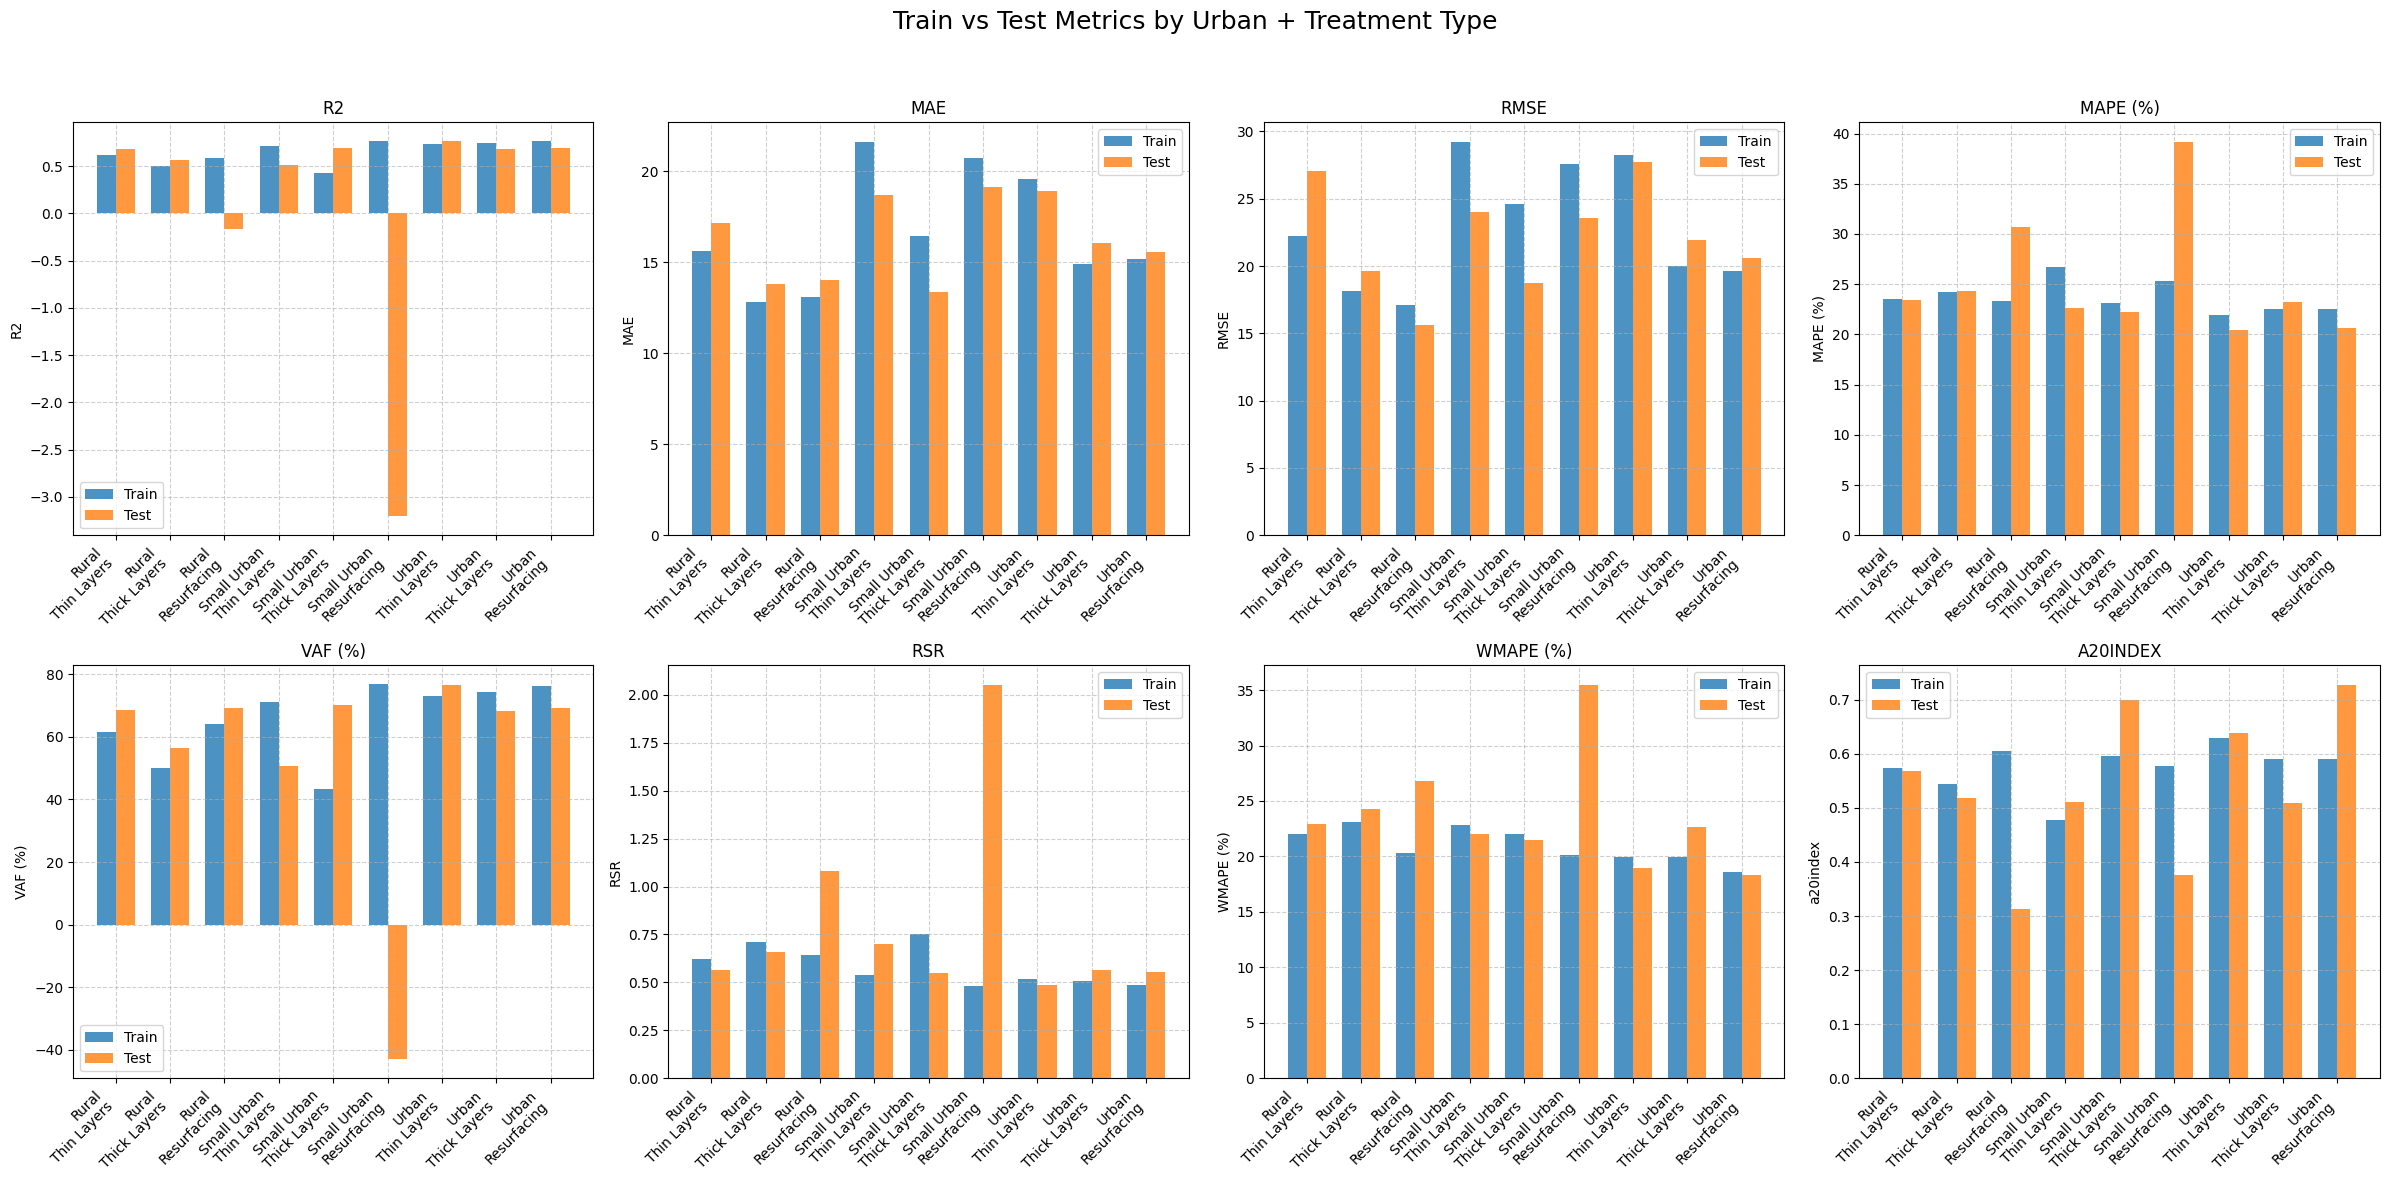

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ Extended Evaluation Function
def evaluate_metrics(df):
    errors = df['y_true'] - df['y_pred']
    mse = mean_squared_error(df['y_true'], df['y_pred'])
    mae = mean_absolute_error(df['y_true'], df['y_pred'])
    rmse = np.sqrt(mse)
    ss_res = np.sum(errors**2)
    ss_tot = np.sum((df['y_true'] - np.mean(df['y_true']))**2)
    r2 = 1 - (ss_res / ss_tot)
    epsilon = 1e-10
    mape = (100 / len(df)) * np.sum(np.abs(errors / (df['y_true'] + epsilon)))
    vaf = (1 - np.var(errors) / np.var(df['y_true'])) * 100
    rsr = rmse / np.sqrt(np.mean((df['y_true'] - np.mean(df['y_true']))**2))
    wmap = (np.sum(np.abs(errors)) / np.sum(np.abs(df['y_true']))) * 100
    m20 = np.sum(np.abs(errors) <= 0.2 * np.abs(df['y_true']))
    a20index = m20 / len(df)

    return r2, mae, rmse, mape, vaf, rsr, wmap, a20index

# ✅ Define Treatment and Urban Types
treatments = {
    'Thin Layers': 'Treatment_type_Thin Layers',
    'Thick Layers': 'Treatment_type_Thick Layers',
    'Resurfacing': 'Treatment_type_Resurfacing',
}

urban_types = {
    'Rural': 'Urban_Type_rural',
    'Small Urban': 'Urban_Type_small urban',
    'Urban': 'Urban_Type_urban',
}

# ✅ Helper to Collect Metrics
def collect_results(df, set_name):
    records = []
    for urban_name, urban_col in urban_types.items():
        urban_df = df[df[urban_col] == 1]
        for treatment_name, treatment_col in treatments.items():
            df_sub = urban_df[urban_df[treatment_col] == 1]
            if len(df_sub) > 0:
                r2, mae, rmse, mape, vaf, rsr, wmap, a20index = evaluate_metrics(df_sub)
                records.append({
                    'Urban': urban_name,
                    'Treatment': treatment_name,
                    'Set': set_name,
                    'R2': r2,
                    'MAE': mae,
                    'RMSE': rmse,
                    'MAPE (%)': mape,
                    'VAF (%)': vaf,
                    'RSR': rsr,
                    'WMAPE (%)': wmap,
                    'a20index': a20index
                })
    return pd.DataFrame(records)

# ✅ Collect metrics for Train and Test
df_train_metrics = collect_results(X_train_unscaled_df, 'Train')
df_test_metrics = collect_results(X_test_unscaled_df, 'Test')
df_all_metrics = pd.concat([df_train_metrics, df_test_metrics], ignore_index=True)

# ✅ Plotting grouped bars for all metrics
metrics = ['R2', 'MAE', 'RMSE', 'MAPE (%)', 'VAF (%)', 'RSR', 'WMAPE (%)', 'a20index']
nrows = 2
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 12))
axes = axes.flatten()

# Create all combinations for consistent ordering
combinations = [(u, t) for u in urban_types for t in treatments]
x_labels = [f"{u}\n{t}" for u, t in combinations]
x = np.arange(len(combinations))
width = 0.35

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    train_vals = []
    test_vals = []

    for u, t in combinations:
        train_val = df_all_metrics[(df_all_metrics['Urban'] == u) &
                                   (df_all_metrics['Treatment'] == t) &
                                   (df_all_metrics['Set'] == 'Train')][metric]
        test_val = df_all_metrics[(df_all_metrics['Urban'] == u) &
                                  (df_all_metrics['Treatment'] == t) &
                                  (df_all_metrics['Set'] == 'Test')][metric]
        train_vals.append(train_val.values[0] if not train_val.empty else np.nan)
        test_vals.append(test_val.values[0] if not test_val.empty else np.nan)

    # Plot bars
    ax.bar(x - width/2, train_vals, width=width, label='Train', alpha=0.8)
    ax.bar(x + width/2, test_vals, width=width, label='Test', alpha=0.8)

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=45, ha='right')
    ax.set_title(metric.upper())
    ax.set_ylabel(metric)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

plt.suptitle("Train vs Test Metrics by Urban + Treatment Type", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
